# 4.4

## a)

In [1]:
from sympy import *
from sympy.plotting import plot, plot3d

In [2]:
x1, x2 = var('x1 x2', real=True)
alpha = var('alpha', real=True)

dFdx1 = 0.05*x1-alpha*x1*x2
dFdx2 = 0.08*x2-alpha*x1*x2

In [3]:
s = solve([dFdx1, dFdx2], [x1, x2], dict=True)
s

[{x1: 0.0, x2: 0.0}, {x1: 0.08/alpha, x2: 0.05/alpha}]

## b)

<ipython-input-8-0135ede216d1>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


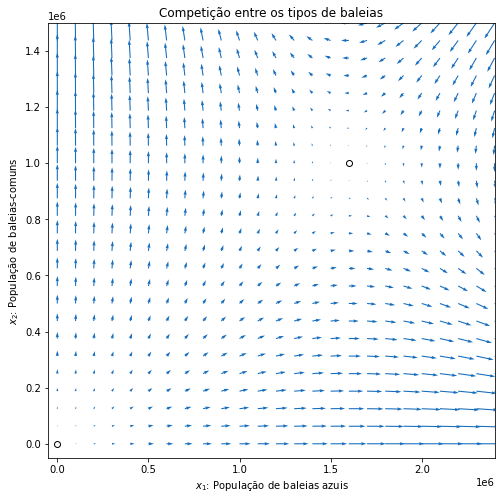

In [8]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)

alphagraph = 5e-8

maxx2 = 0.05/alphagraph*1.5
maxx1 = 0.08/alphagraph*1.5

#maxx2 = 400_000
#maxx1 = 150_000

x1graf, x2graf = np.meshgrid(np.linspace(0, maxx1, 25), np.linspace(0, maxx2, 25))

f1 = 0.05*x1graf-alphagraph*x1graf*x2graf
f2 = 0.08*x2graf-alphagraph*x1graf*x2graf

normalizador = np.sqrt(f1**2+f2**2)
plt.quiver(x1graf, x2graf, f1, f2, color='#156dbd', angles='xy')


plt.scatter([0, 0.08/alphagraph], [0, 0.05/alphagraph], marker='o', edgecolors='black', color='w')

ax = plt.axes()
ax.set_title("Competição entre os tipos de baleias")
ax.set_xlabel('$x_1$: População de baleias azuis')
ax.set_ylabel('$x_2$: População de baleias-comuns')
ax.set_xlim([-50_000, maxx1])
ax.set_ylim([-50_000, maxx2])

plt.show()

## c)

In [5]:
dFdx1x1 = diff(dFdx1, x1)
dFdx2x2 = diff(dFdx2, x2)
dFdx1x2 = diff(dFdx1, x2)
dFdx2x1 = diff(dFdx2, x1)

H = Matrix([
    [dFdx1x1, dFdx1x2],
    [dFdx2x1, dFdx2x2]
])
H

Matrix([
[-alpha*x2 + 0.05,        -alpha*x1],
[       -alpha*x2, -alpha*x1 + 0.08]])

In [6]:
for solucao in s:
    print('Solução: ', solucao)
    display(simplify(H.subs(solucao)))
    print('Autovalores: ')
    display(simplify(H.subs(solucao)).eigenvals())
    print('------------')

Solução:  {x1: 0.0, x2: 0.0}


Matrix([
[0.05,    0],
[   0, 0.08]])

Autovalores: 


{0.0500000000000000: 1, 0.0800000000000000: 1}

------------
Solução:  {x1: 0.08/alpha, x2: 0.05/alpha}


Matrix([
[    0, -0.08],
[-0.05,     0]])

Autovalores: 


{-0.0632455532033676: 1, 0.0632455532033676: 1}

------------


5.1 c)

In [79]:
from IPython.display import display, Math, Latex

t = var(f't', real=True)
e = var(f'e', real=True)

for solucao in s:
    x1x2 = Matrix([[x1], [x2]])
    partes = []
    for i, (autovalor, multiplicity, matriz) in enumerate(simplify(H.subs(solucao)).eigenvects()):
        ci = var(f'c{i+1}', real=True)
        partes.append([ci, matriz[0], e**(autovalor*t)])
        
        print('Autovalor:', autovalor)
        print('Autovetor')
        display(matriz[0])
        print('Multiplicidade:', multiplicity)

    #Eq(x1x2, partes[0] + partes[1])
    print("ERRADO ERRADO ERRADO ERRADO ERRADO ERRADO ")
    print('General solution to this linear system')
    parte1 = ''.join([latex(it) for it in partes[0]])
    parte2 = ''.join([latex(it) for it in partes[1]])
    display(Math(f'{latex(x1x2)}={parte1}+{parte2}'))
    print()

Autovalor: 0.0500000000000000
Autovetor


Matrix([
[1.0],
[  0]])

Multiplicidade: 1
Autovalor: 0.0800000000000000
Autovetor


Matrix([
[  0],
[1.0]])

Multiplicidade: 1
ERRADO ERRADO ERRADO ERRADO ERRADO ERRADO 
General solution to this linear system


<IPython.core.display.Math object>


Autovalor: -0.0632455532033676
Autovetor


Matrix([
[0.784464540552736],
[0.620173672946042]])

Multiplicidade: 1
Autovalor: 0.0632455532033676
Autovetor


Matrix([
[-0.806225774829855],
[ 0.637377439199098]])

Multiplicidade: 1
ERRADO ERRADO ERRADO ERRADO ERRADO ERRADO 
General solution to this linear system


<IPython.core.display.Math object>